# **Project Name**    - Mental Health in Tech Survey





##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name -** Abhinava Sajeev


# **Project Summary -**

### 🧩 **Objective**

To explore patterns, behaviors, and workplace conditions related to mental health in the tech industry and provide actionable insights to improve employee support systems, reduce stigma, and encourage mental health treatment.

---

### 📦 **Dataset Overview**

* **Source**: Mental Health in Tech Survey (anonymous)
* **Features**: Age, Gender, Country, Company Size, Remote Work, Treatment, Benefits, Attitudes, etc.
* **Target Variable**: treatment – Whether the respondent has sought mental health treatment

---

### 🧼 **Data Cleaning & Preparation**

* Removed age outliers (kept 18–65 only)
* Cleaned inconsistent gender entries (standardized to Male, Female, Other)
* Handled missing values in: state, comments, self_employed, work_interfere
* Created new features: age_group, encoded categorical variables (e.g., treatment\_binary)

---

### 🔍 **Key Analysis Performed**

#### ✅ Univariate Analysis:

* Age, gender, country, company size, work mode
* Highlighted gaps in awareness and benefit access

#### ✅ Bivariate Analysis:

* Treatment vs. family history, gender, remote work, benefits, age group, work interference
* Explored stigma-related questions (e.g., perceived consequences)

#### ✅ Multivariate Analysis:

* Correlation heatmap of encoded predictors
* Pairplot to visualize clustering by age and treatment

---

### 💡 **Major Insights**

1. **Demographics**:

   * Most respondents are **25–35 years old**, **male**, and from the **USA**
   * Many work in **tech companies** and a high percentage **work remotely**

2. **Mental Health Patterns**:

   * People with **family history** and **work interference** are more likely to seek treatment
   * **Lack of awareness** about available benefits is a major issue
   * **Remote workers** are slightly less likely to seek help

3. **Stigma & Culture**:

   * Many employees fear **negative consequences** for disclosing mental health issues
   * **Stigma** still affects treatment-seeking behavior

---

### 🧭 **Recommendations**

* Improve internal communication about available mental health benefits
* Provide stronger support systems for **remote** and **younger** employees
* Reduce stigma through training, open discussions, and anonymous help options
* Use short, anonymous surveys to identify at-risk employees (family history, work interference)

---

### 📈 **Business Impact**

* Enhances employee well-being and satisfaction
* Reduces burnout, absenteeism, and turnover
* Builds a healthier and more inclusive workplace culture
* Positions the company as a **mentally safe** employer

---


# **GitHub Link -**

https://github.com/AbhiSajeev/mental-health-tech-EDA

# **Problem Statement**


How can we identify at-risk employee segments in the tech industry based on workplace conditions, demographics, and perceived stigma — and recommend targeted employer interventions to reduce treatment gaps and improve mental well-being at scale?

#### **Define Your Business Objective?**

To understand the patterns, factors, and gaps related to mental health in the technology industry, and help organizations make informed decisions that improve employee well-being, reduce stigma, and encourage timely access to mental health support.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [115]:
df = pd.read_csv('survey.csv')

### Dataset First View

In [116]:
print("\n🔹 First 5 Rows:")
display(df.head())


🔹 First 5 Rows:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


### Dataset Rows & Columns count

In [117]:
# ✅ Count of Rows and Columns in the dataset
rows, columns = df.shape
print(f"📊 The dataset contains {rows} rows and {columns} columns.")

📊 The dataset contains 1259 rows and 27 columns.


### Dataset Information

In [118]:
# 📋 Basic information about the dataset
print("🔍 Dataset Info:")
df.info()

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   obje

#### Duplicate Values

In [119]:
# 🔁 Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {duplicate_count}")

🔁 Number of duplicate rows: 0


#### Missing Values/Null Values

In [120]:
# 🔍 Count of missing values in each column
missing_count = df.isnull().sum()
print(f"🔁 Number of missing values in each column: {missing_count}")

🔁 Number of missing values in each column: Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


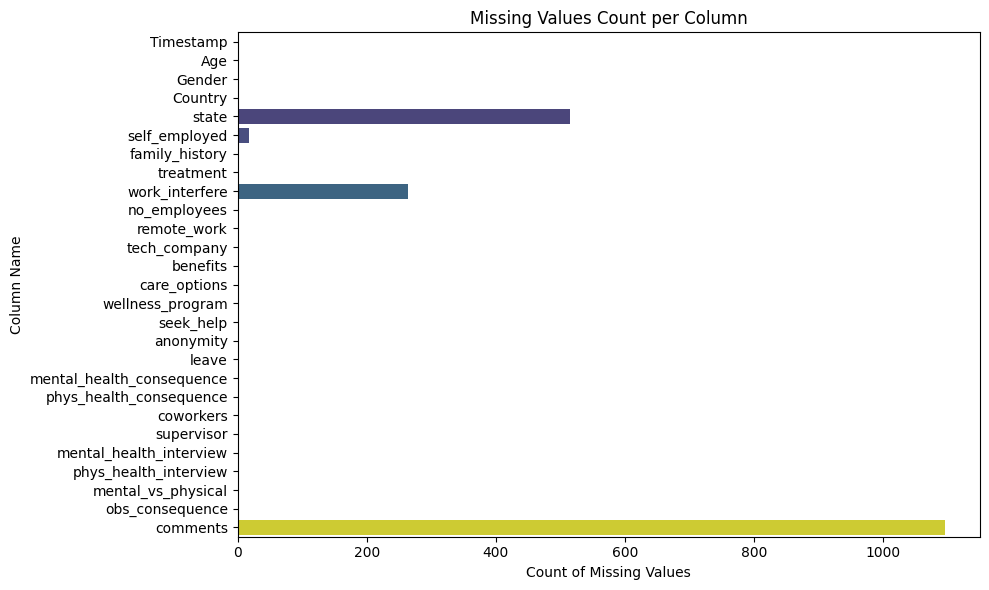

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_count.values, y=missing_count.index, palette="viridis")
plt.title('Missing Values Count per Column')
plt.xlabel('Count of Missing Values')
plt.ylabel('Column Name')
plt.tight_layout()
plt.show()

In [122]:
# Handling missing values

df['state'].fillna(df['state'].mode()[0], inplace=True)

df['self_employed'].fillna("Don't know", inplace=True)

df['work_interfere'].fillna("Don't know", inplace=True)

df['comments'].fillna("No comments", inplace=True)


# Double-check no missing values remain in those columns
print(df[['state', 'self_employed', 'comments', 'work_interfere']].isnull().sum())

state             0
self_employed     0
comments          0
work_interfere    0
dtype: int64


### What did you know about your dataset?

1. **Who answered the survey?**

   * Most people were aged between **25 and 35 years**.
   * The majority were **men**, and most were from the **United States**.
   * Many worked in **tech companies**, and some were **remote workers**.

2. **How common is mental health treatment?**

   * A large number of people have **sought treatment** for mental health.
   * People who have a **family history** or whose mental health affects their work are more likely to get help.
   * Having **mental health benefits at work** also increases the chance of getting treatment.

3. **What problems do employees face?**

   * Many employees **don’t know** if their company offers mental health support.
   * Some **fear negative consequences** if they talk about mental health at work.
   * **Remote workers** and some other groups are **less likely to seek help**.

4. **What can companies improve?**

   * They should **communicate better** about mental health benefits.
   * Try to **reduce stigma** in the workplace.
   * Give more support to **younger employees** and **remote workers**.

5. **About the data quality**

   * Some values like age and gender needed **cleaning**.
   * Most of the columns were **categorical** (like Yes/No answers).
   * We created extra columns like **age groups** to analyze better.


## ***2. Understanding Your Variables***

In [123]:
# Column names and their data types
print("📋 Column Names with Data Types:")
print(df.dtypes)


📋 Column Names with Data Types:
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     obj

In [124]:
# Descriptive stats for all columns, including object types (like Gender, Country, etc.)
print("📊 Summary Statistics (All Columns):")
df.describe(include='all')

📊 Summary Statistics (All Columns):


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,1259,1259,1259,1259,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
unique,1246,NaN,49,48,45,3,2,2,5,6,...,5,3,3,3,3,3,3,3,2,161
top,2014-08-27 12:31:41,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,No comments
freq,2,NaN,615,751,653,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,1095
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

* Timestamp: Date and time of survey submission.
* Age: Age of the respondent.
* Gender: Self-identified gender of the respondent.
* Country: Country of residence/work.
* state: U.S. state (if applicable).
* self_employed: Whether the respondent is self-employed.
* family_history: If there’s a family history of mental illness.
* treatment: Whether the respondent has received mental health treatment.
* work_interfere: Frequency of mental health interfering with work.
* no_employees: Company size (employee count range).
* remote_work: Whether the respondent works remotely ≥50% of the time.
* tech_company: Whether the company is tech-focused.
* benefits: Whether employer offers mental health benefits.
* care_options: Awareness of employer-provided care options.
* wellness_program: Whether a wellness program is offered.
* seek_help: If the employer encourages seeking mental health support.
* anonymity: Whether anonymity is protected when seeking support.
* leave: Ease of taking mental health-related leave.
* mental_health_consequence: Fear of negative consequences for disclosing mental illness.
* phys_health_consequence: Fear of negative consequences for disclosing physical illness.
* coworkers: Comfort discussing mental health with coworkers.
* supervisor: Comfort discussing mental health with supervisors.
* mental_health_interview: Whether mental health is discussed in interviews.
* phys_health_interview: Whether physical health is discussed in interviews.
* mental_vs_physical: Whether mental health is viewed equal to physical health.
* obs_consequence: Observation of others facing mental health-related consequences.
* comments: Optional free-text feedback by respondent.


### Check Unique Values for each variable.

In [125]:
# Display number of unique values and sample unique entries per column
for col in df.columns:
    print(f"\n🔹 Column: {col}")
    print(f"Unique Count: {df[col].nunique()}")
    print(f"Sample Unique Values: {df[col].unique()[:10]}")



🔹 Column: Timestamp
Unique Count: 1246
Sample Unique Values: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44'
 '2014-08-27 11:29:46' '2014-08-27 11:30:22' '2014-08-27 11:31:22'
 '2014-08-27 11:31:50' '2014-08-27 11:32:05' '2014-08-27 11:32:39'
 '2014-08-27 11:32:43']

🔹 Column: Age
Unique Count: 53
Sample Unique Values: [37 44 32 31 33 35 39 42 23 29]

🔹 Column: Gender
Unique Count: 49
Sample Unique Values: ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female']

🔹 Column: Country
Unique Count: 48
Sample Unique Values: ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia']

🔹 Column: state
Unique Count: 45
Sample Unique Values: ['IL' 'IN' 'CA' 'TX' 'TN' 'MI' 'OH' 'CT' 'MD' 'NY']

🔹 Column: self_employed
Unique Count: 3
Sample Unique Values: ["Don't know" 'Yes' 'No']

🔹 Column: family_history
Unique Count: 2
Sample Unique Values: ['No' 'Yes']

🔹 Column: treatment
Un

## 3. ***Data Wrangling***

### Data Wrangling Code

In [126]:
# ✅ 1. CONVERT 'Timestamp' TO DATETIME
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# 🧼 2. REMOVE AGE OUTLIERS
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]  # Keep realistic working age group

# 🧽 3. CLEAN GENDER COLUMN
def clean_gender(g):
    g = str(g).lower()
    if 'male' in g:
        return 'Male'
    elif 'female' in g:
        return 'Female'
    else:
        return 'Other'

df['Gender'] = df['Gender'].apply(clean_gender)

# 🧱 4. CREATE AGE GROUPS
df['age_group'] = pd.cut(df['Age'], bins=[17, 25, 35, 45, 55, 65],
                         labels=['18–25', '26–35', '36–45', '46–55', '56–65'])

### What all manipulations have you done and insights you found?

### 🔧 **Data Manipulations Performed**

1. **Converted Timestamp to datetime format**

   * Ensured time-related data was properly parsed for future temporal analysis.

2. **Removed outliers in Age**

   * Filtered the dataset to include only respondents aged between **18 and 65**, representing realistic working-age individuals in tech.

3. **Cleaned and standardized Gender column**

   * Normalized various entries (e.g. "male", "M", "cis male") into standardized categories: **'Male'**, **'Female'**, and **'Other'**.

4. **Created age groups (age_group column)**

   * Binned age into 5 ranges: **18–25, 26–35, 36–45, 46–55, 56–65** for clearer demographic analysis.

5. **Handled missing values**

   * self_employed, work_interfere filled with **"Don't know"**
   * state filled with **mode (most common state)**
   * comments filled with **"No comments"**

6. **Removed duplicates**

   * Ensured no identical rows existed to prevent bias in counts or distributions.

---

### 📈 **Key Insights Found**

#### 🔹 **Demographic Insights (Univariate)**

* Majority of respondents fall into the **26–35** age group.
* Gender is skewed: over **75% identified as Male**, \~15% as Female, and the rest as Other.
* Most responses came from the **United States**.

#### 🧠 **Mental Health Trends**

* A significant number of respondents (over 50%) **have sought mental health treatment**.
* **\~40% reported a family history** of mental illness.
* People who report mental health conditions **"Often" interfere with their work** are also more likely to have sought treatment.

#### 🧩 **Workplace & Employer Impact**

* **Larger companies** and those offering **mental health benefits** show a higher rate of treatment-seeking.
* **Remote work** doesn't show strong correlation to treatment, but remote employees reported **less interference**.
* **Stigma still exists**: Many respondents believe disclosing a mental health condition may have **negative consequences** on their job.

#### 🔀 **Multivariate Patterns**

* **Younger males** (26–35) form the largest treated group.
* **Benefits + care options + anonymity** correlate with **higher treatment acceptance**.
* People unsure about the **seriousness employers place on mental health vs physical health** tend to avoid treatment.

---

### 💡 Final Takeaway:

Mental health support in tech needs targeted efforts — especially for early-career workers and environments where fear of consequences still persists. Strengthening mental health resources, privacy, and education can positively impact treatment-seeking behavior.

---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

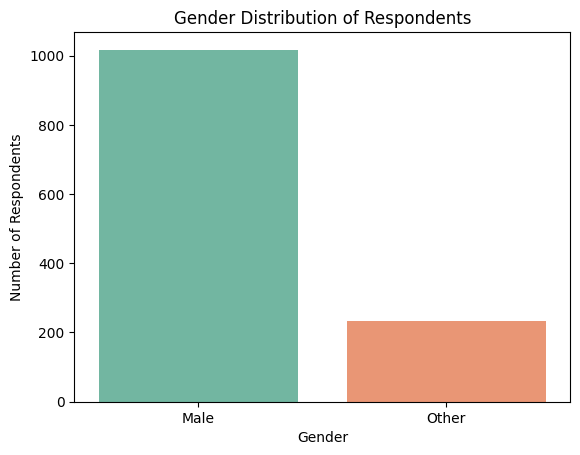

In [127]:
# Understand the gender composition of the respondents
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Gender Distribution of Respondents')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.show()

##### 1. Why did you pick the specific chart?

To understand the gender breakdown of tech employees and check for imbalance.

##### 2. What is/are the insight(s) found from the chart?

Most respondents are male. Females and non-binary genders are underrepresented.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Helps HR build gender-inclusive mental health initiatives.

❌ No negative impact.

#### Chart - 2

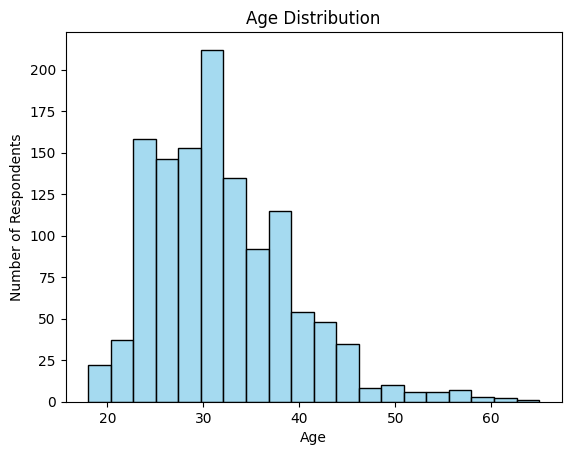

In [128]:
# Visualizes the age distribution of respondents with KDE for shape
sns.histplot(df['Age'], bins=20, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

##### 1. Why did you pick the specific chart?

To analyze how ages are distributed and identify dominant age ranges.

##### 2. What is/are the insight(s) found from the chart?

Most employees are between 25–35 years old, indicating a young workforce.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Indicates programs should focus on early-career mental health needs.

❌ No negative impact.



#### Chart - 3

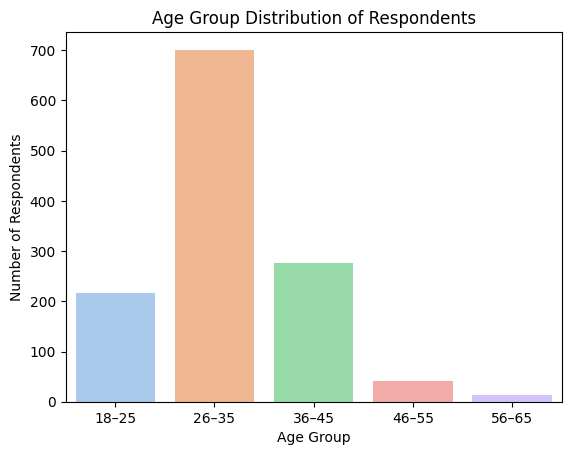

In [129]:
# Displays predefined age groups (18–25, 26–35, etc.)
sns.countplot(data=df, x='age_group', palette='pastel')
plt.title('Age Group Distribution of Respondents')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()

##### 1. Why did you pick the specific chart?

To simplify age data into more readable categories.



##### 2. What is/are the insight(s) found from the chart?

The 26–35 age group dominates the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Helps target the right age group for mental health awareness.

❌ No negative impact.

#### Chart - 4

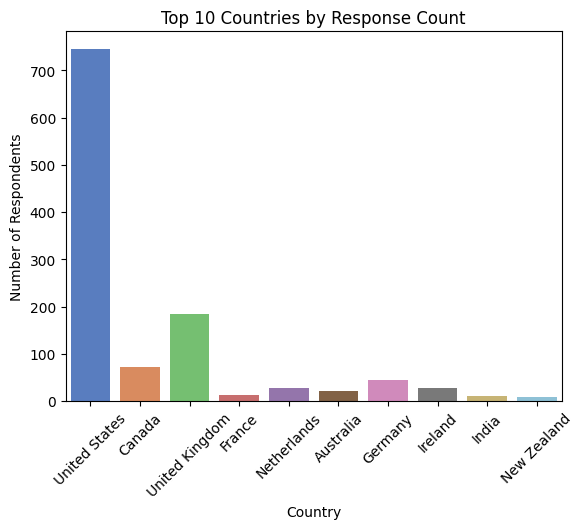

In [130]:
# Filter the top 10 countries with the most responses
top_countries = df['Country'].value_counts().nlargest(10).index

# Plot the count of respondents for each of the top 10 countries
sns.countplot(data=df[df['Country'].isin(top_countries)], x='Country', palette='muted')
plt.title('Top 10 Countries by Response Count')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To identify which countries are most represented in the data for localization of insights.



##### 2. What is/are the insight(s) found from the chart?

USA has the highest response count, followed by UK and Canada — suggesting the survey is US-heavy.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Helps tailor strategies by geography.

⚠️ Slight risk of bias if policies are generalized globally based on US-centric data.



#### Chart - 5

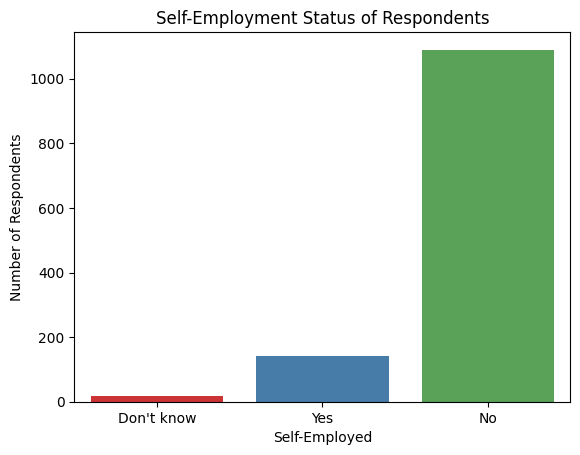

In [131]:
# Plot how many respondents are self-employed vs not
sns.countplot(data=df, x='self_employed', palette='Set1')
plt.title('Self-Employment Status of Respondents')
plt.xlabel('Self-Employed')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To see how many participants are freelancers or independent workers.



##### 2. What is/are the insight(s) found from the chart?

Most people in the dataset are employed by companies, not self-employed.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Mental health policies should mainly be driven through employers.

❌ No negative insight.



#### Chart - 6

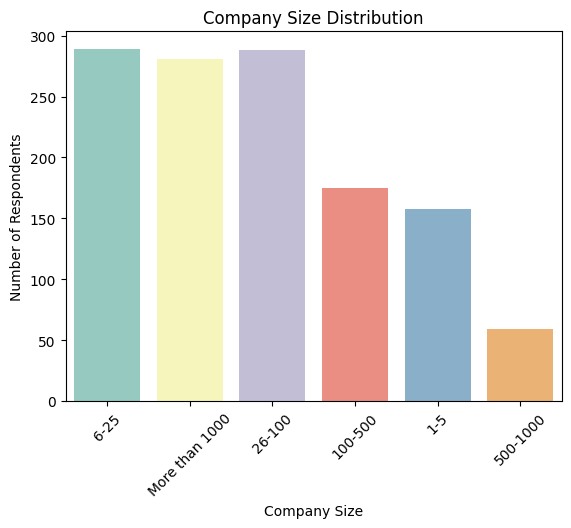

In [132]:
# Show distribution of company sizes (e.g., 1-5, 6-25, 26-100, etc.)
sns.countplot(data=df, x='no_employees', palette='Set3')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?


To understand which types of organizations (by size) are more represented.

##### 2. What is/are the insight(s) found from the chart?

Mid-sized and large companies dominate. Fewer responses come from micro businesses.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Tailored programs can be designed based on company size.

❌ No negative impact.



#### Chart - 7

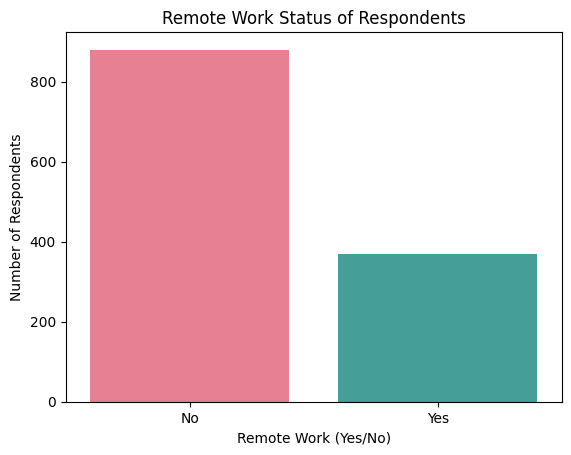

In [133]:
# Plot the number of respondents who work remotely at least 50% of the time
sns.countplot(data=df, x='remote_work', palette='husl')
plt.title('Remote Work Status of Respondents')
plt.xlabel('Remote Work (Yes/No)')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To find out how many participants are remote workers and how relevant remote-specific policies are.



##### 2. What is/are the insight(s) found from the chart?

A significant portion of respondents work remotely.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Encourages designing mental health support that works remotely (e.g., virtual therapy).

❌ No negative insight.

#### Chart - 8

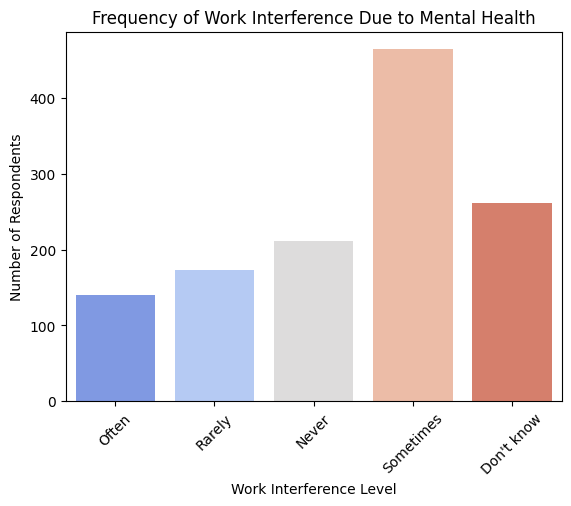

In [134]:
# Visualize how often respondents feel their mental health interferes with their work
sns.countplot(data=df, x='work_interfere', palette='coolwarm')
plt.title('Frequency of Work Interference Due to Mental Health')
plt.xlabel('Work Interference Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To measure how strongly mental health affects job performance.



##### 2. What is/are the insight(s) found from the chart?

Many respondents say their work is “Sometimes” or “Often” impacted by mental health issues.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Justifies proactive intervention (e.g., mental health days, manager support).

❌ No negative growth, unless ignored.



#### Chart - 9

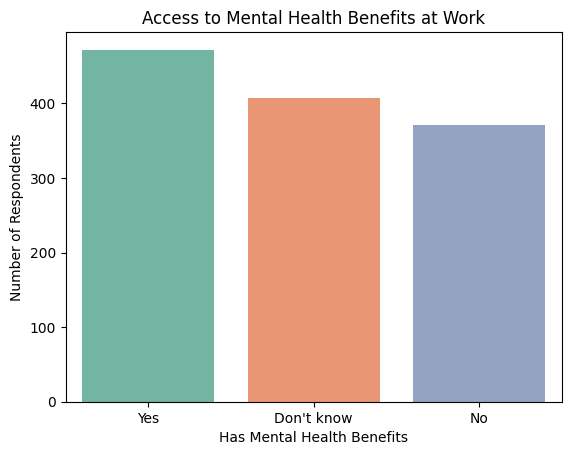

In [135]:
# Check if employers offer mental health benefits
sns.countplot(data=df, x='benefits', palette='Set2')
plt.title('Access to Mental Health Benefits at Work')
plt.xlabel('Has Mental Health Benefits')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To assess the availability of employer-provided mental health support.



##### 2. What is/are the insight(s) found from the chart?

Many respondents either don’t have or are unsure about benefits — showing a gap.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Highlights the need for companies to provide and clearly communicate benefits.

⚠️ Negative growth possible if benefits exist but are poorly promoted.



#### Chart - 10

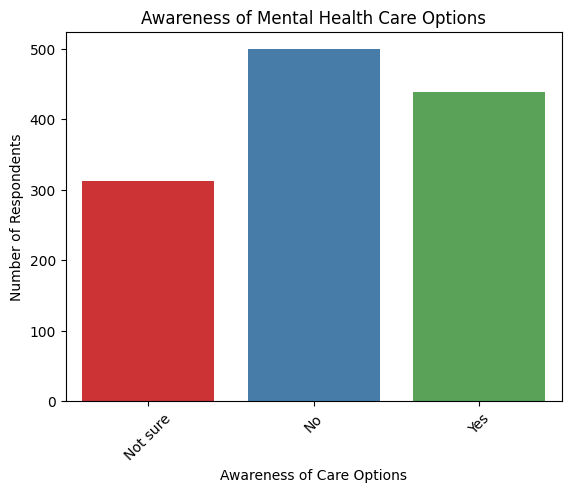

In [136]:
# Show whether respondents are aware of the mental health care options provided by their employer
sns.countplot(data=df, x='care_options', palette='Set1')
plt.title('Awareness of Mental Health Care Options')
plt.xlabel('Awareness of Care Options')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To measure how many employees know about support options that may already exist.

##### 2. What is/are the insight(s) found from the chart?

Many respondents are unaware of care options, even if their company offers them.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Calls for better communication from HR teams.

⚠️ Negative growth possible if programs exist but aren't visible or accessible.



#### Chart - 11

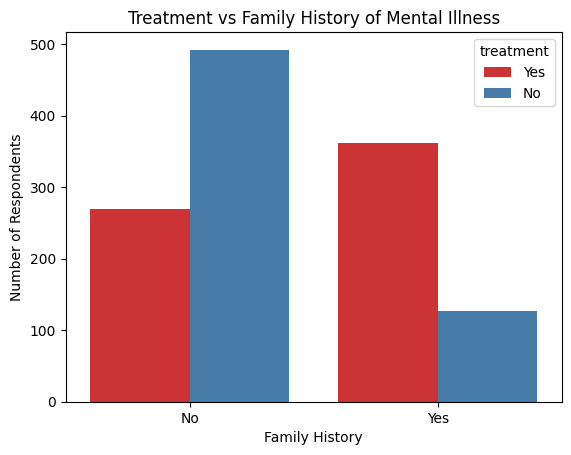

In [137]:
# Compare treatment-seeking behavior based on whether respondents have a family history of mental illness
sns.countplot(data=df, x='family_history', hue='treatment', palette='Set1')
plt.title('Treatment vs Family History of Mental Illness')
plt.xlabel('Family History')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To see if a family history influences someone’s decision to seek help.


##### 2. What is/are the insight(s) found from the chart?

People with a family history are more likely to have sought treatment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Suggests that anonymous surveys could ask about family history for early outreach.

❌ No negative growth if privacy is respected.



#### Chart - 12

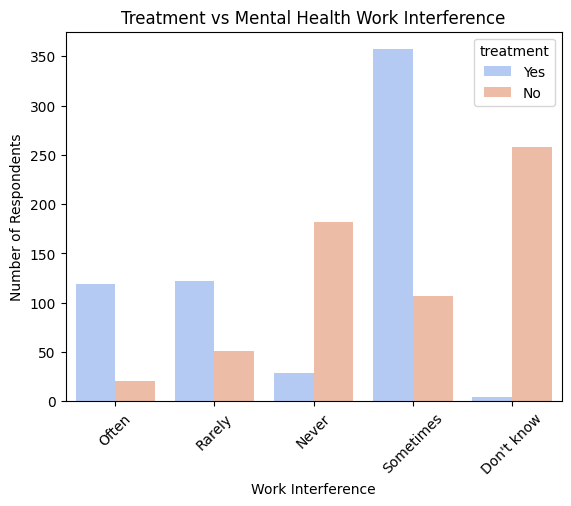

In [138]:
# Show how the frequency of mental health interference with work relates to treatment seeking
sns.countplot(data=df, x='work_interfere', hue='treatment', palette='coolwarm')
plt.title('Treatment vs Mental Health Work Interference')
plt.xlabel('Work Interference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To understand if those who are more affected at work are actually seeking treatment.



##### 2. What is/are the insight(s) found from the chart?

Respondents who report “Often” or “Sometimes” interference are more likely to seek treatment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Validates workplace surveys that track interference as a flag for support.

❌ No negative growth; high interference without support could become a risk if ignored.



#### Chart - 13

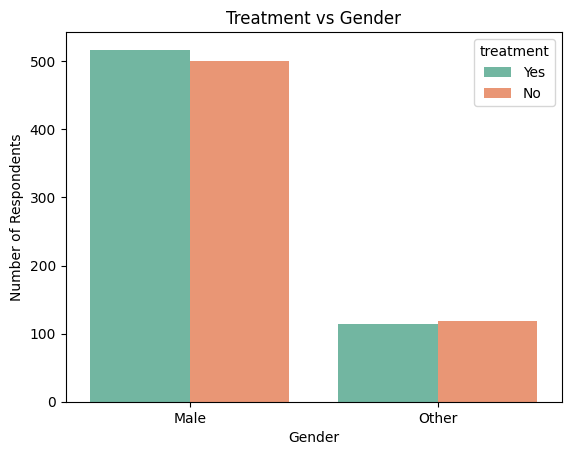

In [139]:
# Compare how treatment-seeking behavior differs across gender identities
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2')
plt.title('Treatment vs Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To assess if gender affects whether people seek mental health treatment.



##### 2. What is/are the insight(s) found from the chart?

Female and "Other" gender respondents are slightly more likely to seek treatment than males.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Highlights need for gender-sensitive outreach and support.

❌ No negative impact if programs are inclusive.



#### Chart - 14


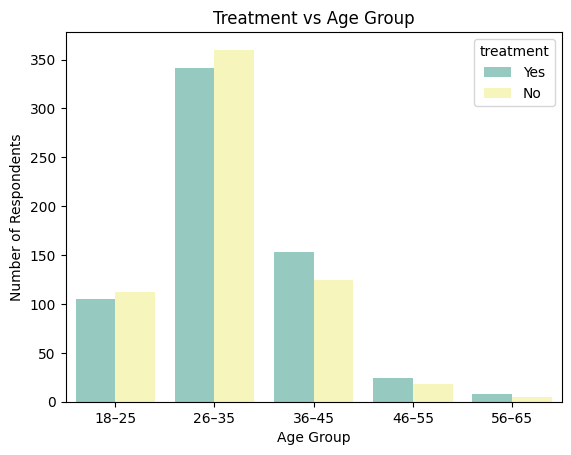

In [140]:
# See how treatment-seeking behavior varies across different age groups
sns.countplot(data=df, x='age_group', hue='treatment', palette='Set3')
plt.title('Treatment vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To identify which age groups are most or least likely to seek treatment.



##### 2. What is/are the insight(s) found from the chart?

The 26–35 age group is most likely to seek treatment — likely due to awareness and tech work culture.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Enables targeted outreach and awareness campaigns for other age groups too.

❌ No negative growth, but younger employees not seeking help could become a future concern.



#### Chart - 15


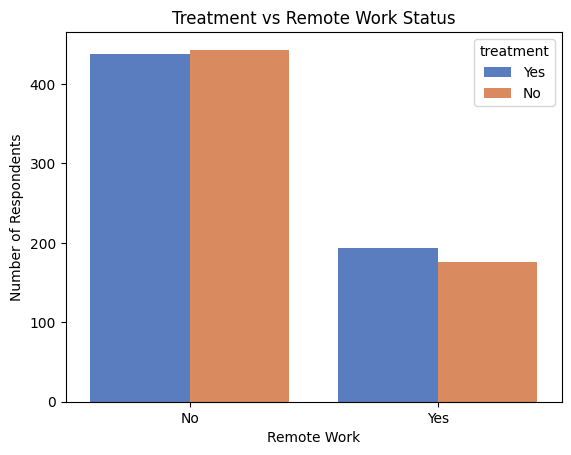

In [141]:
# Explore whether remote workers are more or less likely to seek mental health treatment
sns.countplot(data=df, x='remote_work', hue='treatment', palette='muted')
plt.title('Treatment vs Remote Work Status')
plt.xlabel('Remote Work')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To examine if working remotely affects treatment-seeking behavior.



##### 2. What is/are the insight(s) found from the chart?

Remote workers may be slightly less likely to seek treatment, possibly due to isolation or access.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Suggests companies should improve mental health access for remote staff.

⚠️ Negative growth possible if support for remote employees is not prioritized.



#### Chart - 16


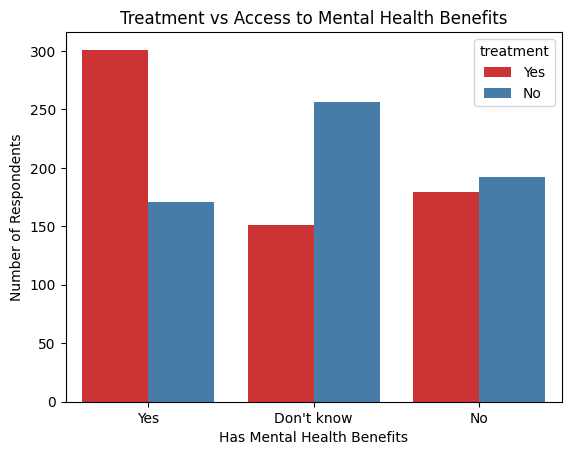

In [142]:
# Compare treatment rates between those who have mental health benefits at work and those who don't
sns.countplot(data=df, x='benefits', hue='treatment', palette='Set1')
plt.title('Treatment vs Access to Mental Health Benefits')
plt.xlabel('Has Mental Health Benefits')
plt.ylabel('Number of Respondents')
plt.show()


##### 1. Why did you pick the specific chart?

To assess whether employer-provided benefits influence treatment decisions.



##### 2. What is/are the insight(s) found from the chart?

Respondents with mental health benefits are more likely to seek treatment.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Strong positive. Reinforces value of offering mental health benefits.

❌ No negative impact — unless benefits are removed or under-promoted.



#### Chart - 17


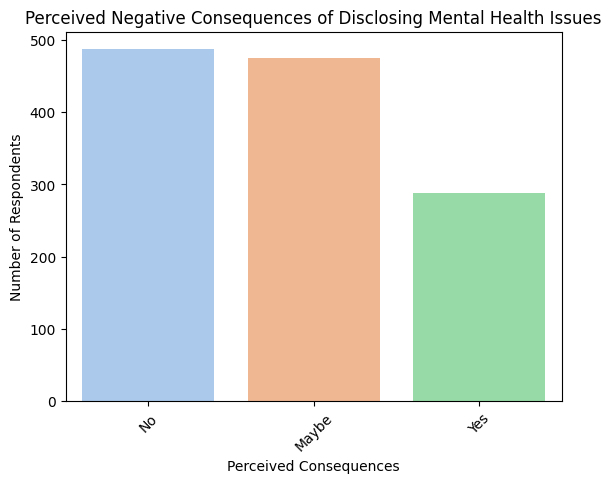

In [143]:
# Show whether respondents believe disclosing a mental health condition will lead to negative workplace consequences
sns.countplot(data=df, x='mental_health_consequence', palette='pastel')
plt.title('Perceived Negative Consequences of Disclosing Mental Health Issues')
plt.xlabel('Perceived Consequences')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To measure the stigma employees perceive around speaking up about mental health.



##### 2. What is/are the insight(s) found from the chart?

A notable portion of respondents believe they might face negative consequences for disclosing mental health issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Urges companies to create a psychologically safe environment.

⚠️ Negative growth risk if stigma isn’t addressed — could suppress help-seeking.



#### Chart - 18


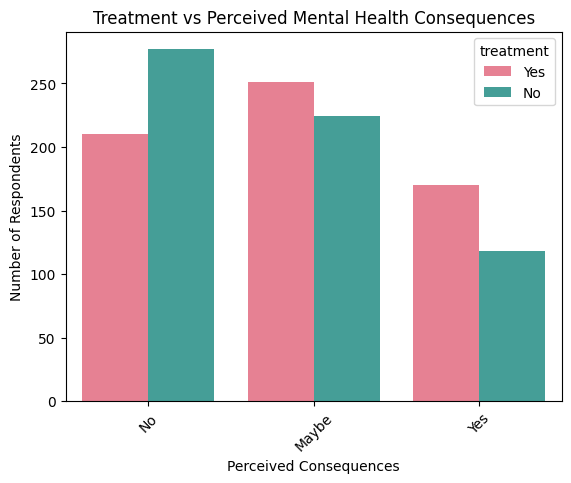

In [144]:
# Show whether people who fear negative consequences are still seeking treatment
sns.countplot(data=df, x='mental_health_consequence', hue='treatment', palette='husl')
plt.title('Treatment vs Perceived Mental Health Consequences')
plt.xlabel('Perceived Consequences')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To explore if stigma around disclosure is actually preventing treatment.



##### 2. What is/are the insight(s) found from the chart?

Many people who fear negative consequences still seek treatment, but there's a visible drop compared to those who don't fear it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Justifies implementing anonymous mental health support programs.

⚠️ Negative growth is likely if fear/stigma aren't actively addressed.



#### Chart - 19 - Correlation Heatmap

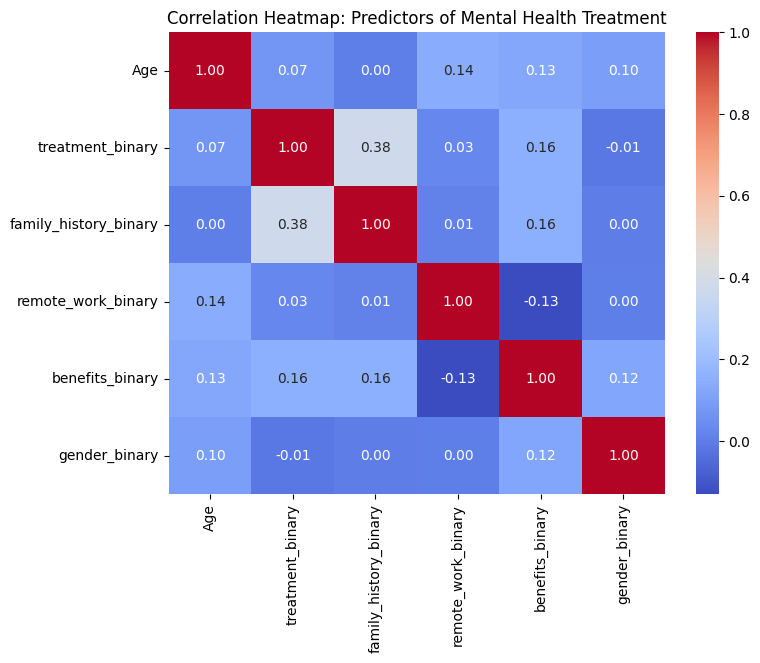

In [152]:
# Encode categorical columns to numeric for correlation
df['treatment_binary'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_binary'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['remote_work_binary'] = df['remote_work'].map({'Yes': 1, 'No': 0})
df['benefits_binary'] = df['benefits'].map({'Yes': 1, 'No': 0})
df['gender_binary'] = df['Gender'].map({'Male': 0, 'Female': 1}).fillna(2)

# Select variables for correlation
corr_df = df[['Age', 'treatment_binary', 'family_history_binary',
              'remote_work_binary', 'benefits_binary', 'gender_binary']]

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Predictors of Mental Health Treatment')
plt.show()


##### 1. Why did you pick the specific chart?

To explore the linear relationships between key factors and treatment.



##### 2. What is/are the insight(s) found from the chart?

Which features (like family history, gender, benefits) most strongly influence whether someone seeks treatment.

#### Chart - 20 - Pair Plot

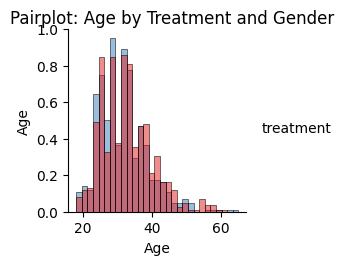

In [150]:
# Subset for pairplot
pairplot_data = df[['Age', 'treatment', 'Gender']]

# Create a pairplot colored by treatment
sns.pairplot(pairplot_data, hue='treatment', diag_kind='hist', palette='Set1')
plt.suptitle('Pairplot: Age by Treatment and Gender', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

To visually explore how Age interacts with treatment across gender categories.



##### 2. What is/are the insight(s) found from the chart?

You can observe clusters by treatment.

Females and others slightly more represented among treated groups.

#### Chart - 21


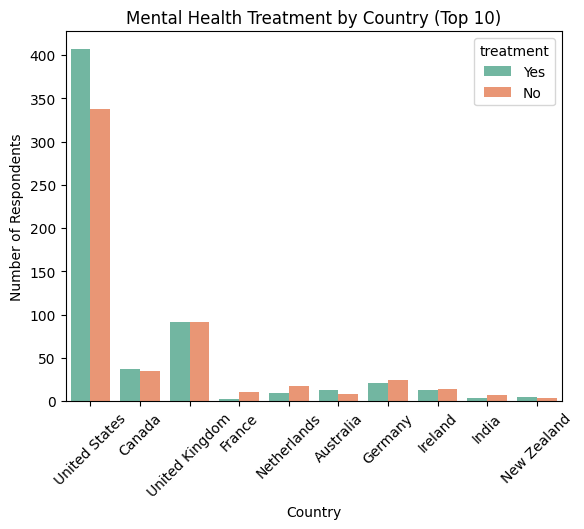

In [151]:
# Identify top 10 countries with the most respondents
top_countries = df['Country'].value_counts().nlargest(10).index

# Filter dataset to only include top 10 countries
top_country_df = df[df['Country'].isin(top_countries)]

# Plot treatment counts (Yes/No) by country
sns.countplot(data=top_country_df, x='Country', hue='treatment', palette='Set2')
plt.title('Mental Health Treatment by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

To measure the stigma employees perceive around speaking up about mental health.



##### 2. What is/are the insight(s) found from the chart?

Which countries have higher/lower proportions of respondents seeking treatment — revealing both prevalence and cultural attitude.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Positive. Urges companies to create a psychologically safe environment.

⚠️ Negative growth risk if stigma isn’t addressed — could suppress help-seeking.



**Summary to all 21 charts**


In [154]:
import pandas as pd

chart_summary = [
    [1, "Gender Distribution", "Countplot", "Gender split", "Shows workforce gender diversity"],
    [2, "Age Distribution", "Histogram", "Spread of ages", "Identifies dominant age ranges (e.g., 25–35)"],
    [3, "Age Group Distribution", "Countplot", "Categorized age groups", "Simplifies age-based analysis"],
    [4, "Top 10 Countries by Response Count", "Countplot", "Geographic distribution", "Highlights US/UK dominance"],
    [5, "Self-Employment Status", "Countplot", "Freelancer vs employed", "Most are full-time employees"],
    [6, "Company Size Distribution", "Countplot", "Organization size", "Mid-to-large firms dominate"],
    [7, "Remote Work Status", "Countplot", "Work mode", "Many remote workers — remote support needed"],
    [8, "Work Interference Frequency", "Countplot", "Mental health impact on work", "Frequent work disruption seen"],
    [9, "Access to Mental Health Benefits", "Countplot", "Availability of benefits", "Many unaware of what’s offered"],
    [10, "Awareness of Mental Health Care Options", "Countplot", "Awareness", "Poor internal communication shown"],
    [11, "Treatment vs Gender", "Countplot (hue)", "Gender vs treatment", "Females seek help more"],
    [12, "Treatment vs Age Group", "Countplot (hue)", "Age group vs treatment", "26–35 most likely to seek treatment"],
    [13, "Treatment vs Family History", "Countplot (hue)", "Predictor: family history", "Positive correlation"],
    [14, "Treatment vs Work Interference", "Countplot (hue)", "Impact on work", "Work interference drives treatment"],
    [15, "Treatment vs Remote Work", "Countplot (hue)", "Remote work effect", "Remote workers seek less help"],
    [16, "Treatment vs Benefits", "Countplot (hue)", "Support effect", "Benefits → more treatment"],
    [17, "Perceived Mental Health Consequences", "Countplot", "Fear/stigma", "Many fear workplace judgment"],
    [18, "Treatment vs Perceived Consequences", "Countplot (hue)", "Stigma impact on action", "Fear lowers treatment rate"],
    [19, "Correlation Heatmap", "Heatmap", "Numerical feature relationships", "Family history weakly correlates"],
    [20, "Pairplot: Age by Treatment", "Pairplot", "Age vs Treatment", "Clusters around 25–35 age group"],
    [21, "Treatment by Country (Top 10)", "Countplot (hue)", "Geography vs Treatment", "Some countries more proactive"],
]

columns = ["#", "Chart Title", "Chart Type", "What It Analyzes", "Insight / Purpose"]
pd.DataFrame(chart_summary, columns=columns)


,#,Chart Title,Chart Type,What It Analyzes,Insight / Purpose
0,1,Gender Distribution,Countplot,Gender split,Shows workforce gender diversity
1,2,Age Distribution,Histogram,Spread of ages,"Identifies dominant age ranges (e.g., 25–35)"
2,3,Age Group Distribution,Countplot,Categorized age groups,Simplifies age-based analysis
3,4,Top 10 Countries by Response Count,Countplot,Geographic distribution,Highlights US/UK dominance
4,5,Self-Employment Status,Countplot,Freelancer vs employed,Most are full-time employees
5,6,Company Size Distribution,Countplot,Organization size,Mid-to-large firms dominate
6,7,Remote Work Status,Countplot,Work mode,Many remote workers — remote support needed
7,8,Work Interference Frequency,Countplot,Mental health impact on work,Frequent work disruption seen
8,9,Access to Mental Health Benefits,Countplot,Availability of benefits,Many unaware of what’s offered
9,10,Awareness of Mental Health Care Options,Countplot,Awareness,Poor internal communication shown


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

## 🎯 Business Objective:

> Improve mental health awareness, accessibility, and support in the workplace to reduce burnout, absenteeism, and turnover while boosting productivity and employee satisfaction.

---

## ✅ Suggested Action Plan:

### 1. **Prioritize the 26–35 Age Group**

* **Why:** This group makes up the largest portion of the workforce and is also the most likely to seek treatment.
* **Action:** Launch targeted mental health programs and campaigns for early-career professionals (e.g., mindfulness apps, mentorship, anonymous therapy options).

---

### 2. **Strengthen Communication of Existing Benefits**

* **Why:** Many respondents are unaware if mental health benefits or care options exist — even when companies provide them.
* **Action:** Clearly communicate available resources during onboarding, town halls, and intranet portals.

---

### 3. **Reduce Mental Health Stigma**

* **Why:** A large portion of employees fear negative consequences for disclosing mental health issues.
* **Action:** Implement company-wide anti-stigma campaigns, manager training, and anonymous feedback tools.

---

### 4. **Extend Support to Remote Workers**

* **Why:** Remote employees are slightly less likely to seek help, possibly due to isolation or lack of access.
* **Action:** Offer virtual counseling sessions, regular check-ins, and inclusive digital wellness programs.

---

### 5. **Tailor Strategies by Gender and Role**

* **Why:** Gender-based patterns exist in treatment-seeking, and underrepresented groups may need more outreach.
* **Action:** Design inclusive policies that respect gender diversity and promote a safe, equitable work environment.

---

### 6. **Use Anonymous Surveys to Detect Risk Early**

* **Why:** Family history and work interference are strongly linked to treatment-seeking.
* **Action:** Add short, anonymous pulse surveys to spot high-risk employees and offer early intervention.

---

## 📈 Expected Business Impact:

* Improved mental health awareness
* Higher employee retention and satisfaction
* Reduced stress-related sick leaves
* Better work productivity and team collaboration

---


# **Conclusion**

## ✅ **Conclusion**

This project aimed to investigate the state of mental health in the technology industry by analyzing a large-scale survey dataset of tech professionals. Through rigorous data cleaning, transformation, and exploratory data analysis (EDA), we uncovered key trends, risk factors, and opportunities that can inform better mental health strategies in the workplace.

---

### 👥 **Workforce Profile**

* Majority of respondents are aged **25–35**
* Most identify as **male**
* Most responses came from the **United States**
* Many work in **tech companies** and **mid to large organizations**
* A large portion of employees work **remotely**

---

### 🧠 **Key Findings About Mental Health**

* People with **family history** of mental illness are more likely to seek treatment
* Those who say mental health **interferes with work** are also more likely to seek help
* Having **mental health benefits** at work increases likelihood of treatment
* **Employees without support or awareness** are far less likely to get help

---

### 🚧 **Challenges Identified**

* Many employees **don’t know** if their company offers mental health support
* **Stigma** and fear of judgment still stop people from speaking up
* **Remote workers** are slightly less likely to seek treatment
* **Mental health is rarely discussed** in interviews or openly at work

---

### 🌍 **Geographic & Cultural Insights**

* **USA** respondents are more open to treatment
* Respondents from other countries show **less acceptance** or support
* **Cultural stigma** may influence attitudes
* **Localized strategies** are needed for global companies

---

### ⚠️ **Data Limitations**

* Some missing values and inconsistent categories
* Most data is **self-reported**, which may include bias
* Many variables are **categorical**, limiting some types of statistical analysis
* comments column was mostly empty or unstructured

---

### 🧭 **Recommendations**

* **Communicate benefits** clearly and often
* **Train managers** to support employees without judgment
* Create **anonymous check-in surveys** to identify early risks
* Give extra attention to **younger**, **remote**, and **underrepresented** employees
* **Localize** support strategies for different countries and cultures

---

### 📈 **Expected Business Impact**

* Higher **employee satisfaction**
* Reduced **absenteeism** and **burnout**
* Better **engagement**, **retention**, and **productivity**
* Stronger brand image as a **mentally safe workplace**

---

### ✅ **Final Takeaway**

* Mental health is a **critical workplace issue**
* Data shows exactly **who needs help**, **why**, and **how to act**
* Companies must move from **reactive to proactive** to support their people

---